<img src="./img/banner.png">

# Laboratorio 1 - SaludAlpes

El objetivo de este notebook ...


Tabla de contenido:

1. Carga y exploración de datos.

    1.1. Importación de librerias.
    
    1.2. Carga de datos.
    
    1.3. Exploración.
    
2. Limpieza y preparación de los datos.

    2.1. Tipo adecuado de cada atributo.
    
    2.2. Selección de atributos.
    
3. Clasificadores.

    3.1.1. Arbol de decisión.
    
    3.1.2. Métricas de rendimiento.
    
    3.1.3. Interpretación del modelo.
       
    3.2.1. KNN.
    
    3.2.1. Métricas de rendimiento.
  

## 1. Carga y exploración de datos.

### 1.1. Importación de librerias.

In [353]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np

# preparacion de los datos

# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 

# para crear KNN
from sklearn.neighbors import KNeighborsClassifier

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV

# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split

# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score, classification_report, plot_confusion_matrix

#Librerías para la visualización
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 
%matplotlib inline
from sklearn import tree


### 1.2. Carga de datos.

In [288]:
# carga de los datos
# csv -> dataFrame
df_diagnostics = pd.read_csv('./datos/SaludAlpes_diagnosticos_dataset.csv', sep=';', encoding = 'utf-8' )

### 1.3. Exploración.

In [289]:
#cantidad de datos y numero de variables
df_diagnostics.shape

(768, 11)

In [290]:
# mostrar las primeras 5 filas
df_diagnostics.head(5)

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [291]:
# ver todos los tipos de variables 
df_diagnostics.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

In [292]:
# descripcion de cada atributo de los datos reconocidos como int64(Enteros)
df_diagnostics.describe()

,BMI,Age
count,768.000000,768.000000
mean,289.796875,38.011719
std,116.757554,117.825600
min,0.000000,21.000000
25%,251.750000,24.000000
50%,309.000000,29.000000
75%,359.000000,41.000000
max,671.000000,3256.000000


In [293]:
# ausencia y cantidad de datos faltantes de las columnas.
df_diagnostics.isnull().sum()

Hair color                  0
Pregnancies                 0
Glucose                     0
City                        0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No existen datos faltantes.

## 2. Limpieza y preparación de los datos.

### 2.1. Tipo adecuado de cada atributo.

Primero realizaremos el cambio de tipo de cada columna, acorde con el tipo de datos que maneja.

In [294]:
# mostrar las primeras 5 filas
df_diagnostics.head(5)

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [295]:
# ver todos los tipos de variables 
df_diagnostics.dtypes

Hair color                  object
Pregnancies                 object
Glucose                     object
City                        object
BloodPressure               object
SkinThickness               object
Insulin                     object
BMI                          int64
DiabetesPedigreeFunction    object
Age                          int64
Outcome                     object
dtype: object

Como podemos observar las columnas de '**Pregnancies**', '**Glucose**', '**BloodPressure**', '**SkinThickness**', '**Insulin**' , '**DiabetesPedigreeFunction**' y **'Outcome'** son de tipo entero, sin embargo pandas las a reconocido como object.

In [296]:
# se realiza la limpieza y la preparacion sobre otro df(dataFrame)
df_diagnostics_t = df_diagnostics

Al intentar cambiar el tipo de cada columna a entero, nos arroja un error: ` ValueError: invalid literal for int() with base 10: '-' `
Esto es debido a que existen datos o caracteres que no corresponden en la columna a cambiar, en este caso existe el caracter '-' el cual no nos permite cambiar el tipo de la columna

In [297]:
# buscamos la fila con el caracter anomalo '-'
raro = df_diagnostics_t[df_diagnostics_t['Pregnancies'].str.contains('-')]
print(raro)

    Hair color Pregnancies Glucose City BloodPressure SkinThickness Insulin  \
583      Black           -       -    -             -             -       -   

     BMI DiabetesPedigreeFunction  Age Outcome  
583  387                        -   42       -  


Como podemos observar la fila 583 contiene varias columnas con este valor, lo cual no aporta informacion relevante para los modelos de ML y sera eliminada

In [298]:
# eliminamos la fila que contiene '-' en la columna Pregnancies
df_diagnostics_t = df_diagnostics_t.drop(df_diagnostics_t[df_diagnostics_t.Pregnancies.str.contains('-')].index)

Ahora convertimos cada columna en su correspondiente tipo de datos

In [299]:
#cambiamos el tipo de datos de cada columna a su correspondiente tipo
df_diagnostics_t['Pregnancies'] = df_diagnostics_t.Pregnancies.astype(int)
df_diagnostics_t['Glucose'] = df_diagnostics_t.Glucose.astype(int)
df_diagnostics_t['BloodPressure'] = df_diagnostics_t.BloodPressure.astype(int)
df_diagnostics_t['SkinThickness'] = df_diagnostics_t.SkinThickness.astype(int)
df_diagnostics_t['Insulin'] = df_diagnostics_t.Insulin.astype(int)
df_diagnostics_t['DiabetesPedigreeFunction'] = df_diagnostics_t.DiabetesPedigreeFunction.astype(int)
df_diagnostics_t['Outcome'] = df_diagnostics_t.Outcome.astype(int)

Comprobamos que las columnas correspondan con su tipo. 

In [300]:
df_diagnostics_t.dtypes

Hair color                  object
Pregnancies                  int64
Glucose                      int64
City                        object
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                          int64
DiabetesPedigreeFunction     int64
Age                          int64
Outcome                      int64
dtype: object

### 2.2. Selección de atributos.

En este punto deseamos conocer cuales son las columnas más importantes para nuestro modelo, aquellas que aporten valor y sirvan para crear modelos más precisos y exactos.
Para este punto necesitamos conocimiento sobre cada atributo y como este podria impactar en la prediccion del modelo.

Primero convertiremos los datos categoricos en datos numericos para conocer si realizan algún aporte significativo en el diagnóstico de diabetes.

En este caso las columnas de  **Hair color** y **City** son categoricos. 

In [301]:
# valores de la variable categorica
df_diagnostics_t['Hair color'].value_counts()

Black    685
Red       50
Blue      32
Name: Hair color, dtype: int64

In [302]:
# valores de la variable categorica
df_diagnostics_t['City'].value_counts()

New York    767
Name: City, dtype: int64

In [303]:
# convertiremos los datos categoricos en enteros para poder manejarlos mejor

#mapping para la columna de Hair color
cat_mapping_hair = {'Black':0,'Red':1,'Blue':2}
# map sobre la columna de Hair color
df_diagnostics_t['Hair color'] = df_diagnostics_t['Hair color'].map(cat_mapping_hair)

#mapping para la columna de City
cat_mapping_city = {'New York':0}
df_diagnostics_t['City'] = df_diagnostics_t['City'].map(cat_mapping_city)

#comprobamos
df_diagnostics_t.head(3)


,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,0,72,35,0,336,627,50,1
1,0,1,85,0,66,29,0,266,351,31,0
2,1,8,183,0,64,0,0,233,672,32,1


In [304]:
#resumen de los datos
df_diagnostics_t.describe()

,Hair color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.0,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,0.148631,3.839635,120.921773,0.0,69.096480,20.563233,79.903520,289.670143,432.395046,38.006519,0.349413
std,0.458537,3.368429,31.984561,0.0,19.366833,15.945349,115.283105,116.780873,336.144934,117.902397,0.477096
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,0.000000,1.000000,99.000000,0.0,62.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,0.000000,3.000000,117.000000,0.0,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,0.000000,6.000000,140.500000,0.0,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,2.000000,17.000000,199.000000,0.0,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


Podemos observar que el atributo de **City** solo tiene el valor de cero para toda la columna. En este caso **City** no realizará ningun aporte para los modelos de ML. Entonces Procedemos a elminar esta columna.

In [305]:
#Eliminamos la columna City
del df_diagnostics_t['City']

In [306]:
df_diagnostics_t.BloodPressure.count

<bound method Series.count of 0      72
1      66
2      64
3      66
4      40
       ..
763    76
764    70
765    72
766    60
767    70
Name: BloodPressure, Length: 767, dtype: int64>

podemos observar que existen 72 filas que no cumplen con esta condición, por tal motivo, determinamos cambiar los valores de 0 con la media de la columna para no perder información valiosa. Tambien se puede deducir con esta infromacion que una persona que muestre una presion sanguinea igual a 0, es que no estaria viva.

In [307]:
mediaPresion = df_diagnostics_t.BloodPressure.mean()
print(mediaPresion)

69.09647979139504


In [308]:
df_diagnostics_t.BloodPressure = df_diagnostics_t.BloodPressure.replace({0:mediaPresion})
#comprobamos que no existan valores con presion igual a 0
print(df_diagnostics_t[df_diagnostics_t['BloodPressure']==0])

Empty DataFrame
Columns: [Hair color, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Ahora tambien el diccionario nos afirma que la glucosa debe tener valores mayores a 0, entonces comprobamos si cumple con esta condición.

In [309]:
df_diagnostics_t.Glucose.count

<bound method Series.count of 0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: Glucose, Length: 767, dtype: int64>

Podemos observar que existen 148 registros con el valor de glucosa igual a 0, entonces al tener esta cantidad considerable de registros no podemos prescindir de ellos. por tal motivo decidimos conservarlos y cambiar este valor por la media de la columna de glucosa.

In [310]:
mediaGlucosa = df_diagnostics_t.Glucose.mean()
print(mediaGlucosa)

120.92177314211213


In [311]:
df_diagnostics_t.Glucose = df_diagnostics_t.Glucose.replace({0:mediaGlucosa})
#comprobamos que no existan valores con glucosa igual a 0
print(df_diagnostics_t[df_diagnostics_t['Glucose']==0])

Empty DataFrame
Columns: [Hair color, Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


In [312]:
#resumen de los datos
df_diagnostics_t.describe()

,Hair color,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,0.148631,3.839635,121.710051,72.249513,20.563233,79.903520,289.670143,432.395046,38.006519,0.349413
std,0.458537,3.368429,30.445781,12.123188,15.945349,115.283105,116.780873,336.144934,117.902397,0.477096
min,0.000000,0.000000,44.000000,24.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,0.000000,1.000000,99.500000,64.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,0.000000,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,0.000000,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,2.000000,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


A continuación se realizará sera una grafica para visualizar la correlacion que existe entre los datos.

In [313]:
correlat = df_diagnostics_t.corr()
print(correlat)

                          Hair color  Pregnancies   Glucose  BloodPressure  \
Hair color                  1.000000     0.028130 -0.054355      -0.022066   
Pregnancies                 0.028130     1.000000  0.129280       0.208707   
Glucose                    -0.054355     0.129280  1.000000       0.220040   
BloodPressure              -0.022066     0.208707  0.220040       1.000000   
SkinThickness               0.062277    -0.079765  0.073845       0.021508   
Insulin                     0.030994    -0.072515  0.330755      -0.037858   
BMI                         0.044020    -0.007944  0.169594       0.175498   
DiabetesPedigreeFunction   -0.023682    -0.024954  0.135641       0.010394   
Age                        -0.011754     0.020064 -0.006168       0.002627   
Outcome                    -0.028842     0.223376  0.492564       0.163340   

                          SkinThickness   Insulin       BMI  \
Hair color                     0.062277  0.030994  0.044020   
Pregnancies    

<AxesSubplot:>

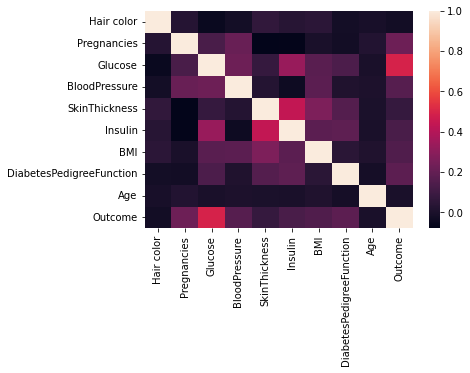

In [314]:
#grafica de correlación
sns.heatmap(correlat)

Se puede apreciar los atributos que tienen correalción con la variable de la etiqueta. Entre más brillante mayor sera la correlacion, en este caso vemos que las variables de **Age** y **Hair color** no tiene ninguna correlacion con la variable de **Outcome** o con el diagnóstico de diabetes. Por tal motivo podemos prescindir de ellas. 

In [315]:
# Eliminamos las columnas de Hair Color y Age
del df_diagnostics_t['Hair color']
del df_diagnostics_t['Age']

#Comprobamos el estado del df
df_diagnostics_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    int64  
 6   DiabetesPedigreeFunction  767 non-null    int64  
 7   Outcome                   767 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 53.9 KB


In [316]:
#cantidad de datos de cada clase
pd.value_counts(df_diagnostics_t['Outcome'])

0    499
1    268
Name: Outcome, dtype: int64

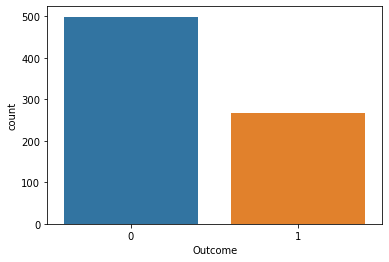

In [317]:
ax = sns.countplot(x='Outcome', data = df_diagnostics_t)

In [318]:
# Revisión del total de registros
df_diagnostics_t.shape

(767, 8)

## 3. Clasificadores.

### 3.1.1. Arbol de decisión.


In [319]:
# Seleccionamos la variable objetivo - 'Outcome'
Y = df_diagnostics_t['Outcome']
# Eliminamos la variable 'Outcome' del conjunto de datos
X = df_diagnostics_t.drop(['Outcome'], axis=1)

In [320]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=0)

In [321]:
# Crear arbol de decisión. El criterio de pureza sera la entropía
arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)

In [322]:
# Entrenar arbol de decisión con los datos de entrenamiento
arbol = arbol.fit( X_train, Y_train)

### 3.1.2. Métricas de rendimiento.

Ahora determinaremos el rendimiento del modelo del arbol de decisión.

In [323]:
# Determinamos las predicciones del modelo sobre el conjunto test
y_pred = arbol.predict(X_test)

In [324]:
# Generamos la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[160,  47],
       [ 40,  60]])

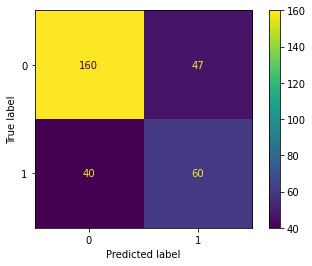

In [325]:
# grafica de la matriz de confusión
plot_confusion_matrix(arbol, X_test, Y_test)
plt.show()

In [329]:
# Metricas de rendimiento
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.72
Recall: 0.6
Precisión: 0.5607476635514018
Puntuación F1: 0.5797101449275363


In [330]:
# reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79       207
           1       0.56      0.60      0.58       100

    accuracy                           0.72       307
   macro avg       0.68      0.69      0.68       307
weighted avg       0.72      0.72      0.72       307



### 3.1.3. Interpretación del modelo.

In [331]:
# importancia de las variables, muestra el peso para cada atributo, entre mayor sea este más importante sera para la variable asociada.
importancia = arbol.feature_importances_
importancia

array([0.12811827, 0.2707001 , 0.04853355, 0.11298275, 0.07324927,
       0.1824081 , 0.18400796])

In [332]:
import_atributo = pd.DataFrame( data={ "Atributo": X_train.columns,"Importancia": importancia } )
import_atributo = import_atributo.sort_values(by='Importancia',ascending=False).reset_index(drop=True)
import_atributo

,Atributo,Importancia
0,Glucose,0.270700
1,DiabetesPedigreeFunction,0.184008
2,BMI,0.182408
3,Pregnancies,0.128118
4,SkinThickness,0.112983
5,Insulin,0.073249
6,BloodPressure,0.048534


Podemos observar que el atributo con mayor importancia es la **Glucose**, que era de esperarse por nuestra tabla de correlaciones.

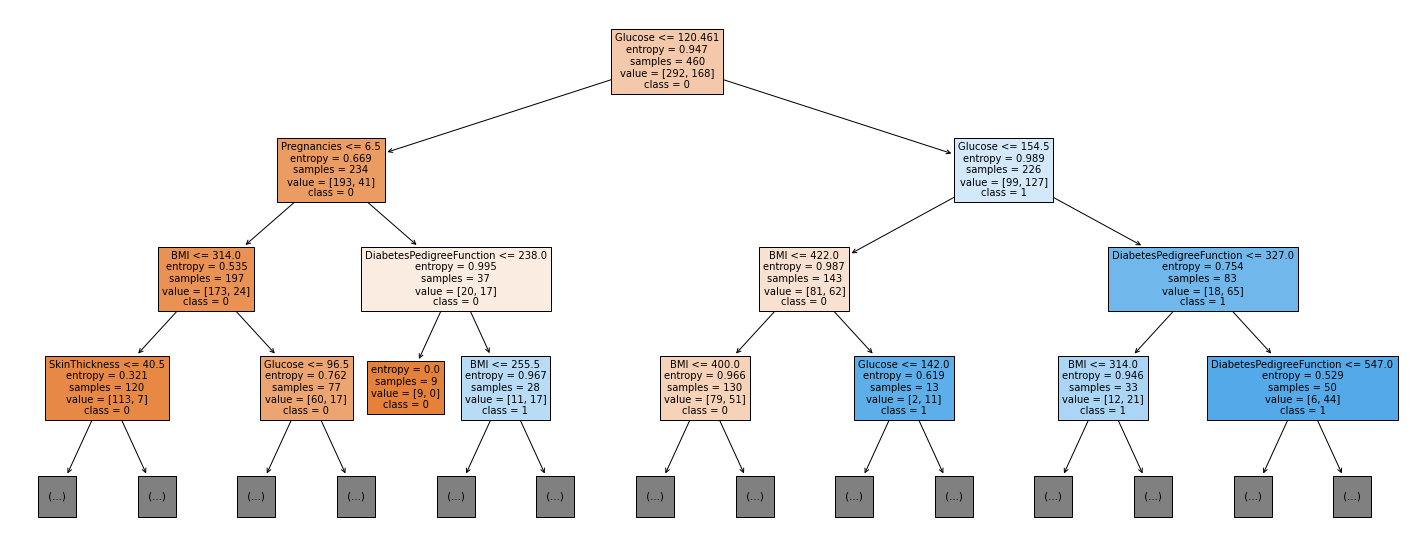

In [333]:
fig = plt.figure( figsize=(25,10))
_ = tree.plot_tree(arbol, max_depth=3, feature_names=X.columns, class_names=["0","1"], filled=True, fontsize=10)

### 3.2.1. KNN.

In [335]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = df_diagnostics_t['Outcome']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = df_diagnostics_t.drop(['Outcome'], axis=1)

In [336]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [339]:
 neigh = KNeighborsClassifier(n_neighbors=3)
 neigh = neigh.fit(X_train, Y_train)

In [340]:
 y_pred = neigh.predict(X_test)

### 3.2.2. Métricas de rendimiento.

In [341]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[82, 26],
       [25, 21]])

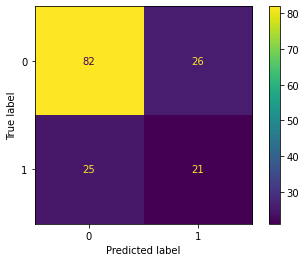

In [342]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

In [343]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       108
           1       0.45      0.46      0.45        46

    accuracy                           0.67       154
   macro avg       0.61      0.61      0.61       154
weighted avg       0.67      0.67      0.67       154



In [344]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.67
Recall: 0.45652173913043476
Precisión: 0.44680851063829785
Puntuación F1: 0.45161290322580644


In [345]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
neigh = KNeighborsClassifier(n_neighbors=3) # arbol = DecisionTreeClassifier(criterion='entropy', random_state=0)
neigh = neigh.fit(X_train, Y_train) # arbol = arbol.fit(X_train,Y_train)
y_pred = neigh.predict(X_test) # y_pred = arbol.predict(X_test)
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.67
Recall: 0.45652173913043476
Precisión: 0.44680851063829785
Puntuación F1: 0.45161290322580644


In [346]:
# Calculemos también las métricas de rendimiento sobre el conjunto de entrenamiento.
y_pred = neigh.predict(X_train) # y_pred = arbol.predict(X_train)
print('Exactitud: %.2f' % accuracy_score(Y_train, y_pred))
print("Recall: {}".format(recall_score(Y_train,y_pred)))
print("Precisión: {}".format(precision_score(Y_train,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_train,y_pred)))

Exactitud: 0.84
Recall: 0.7207207207207207
Precisión: 0.8163265306122449
Puntuación F1: 0.7655502392344496


In [365]:
# Mostrar reporte de clasificación
print(classification_report(Y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88       391
         1.0       0.83      0.71      0.76       222

    accuracy                           0.84       613
   macro avg       0.84      0.81      0.82       613
weighted avg       0.84      0.84      0.84       613



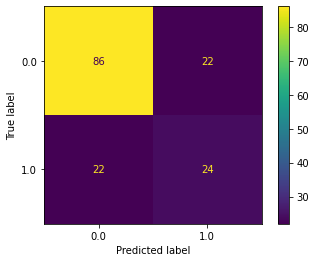

In [364]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()